# Visualisation interactive d'images avec napari
[napari](https://napari.org/) est un visualiseur d'images basé sur Python. Aujourd'hui, nous allons l'utiliser en le contrôlant à distance depuis un notebook Jupyter.

Voir aussi
* [Tutoriels napari](https://napari.org/tutorials/index.html)
* [Webinaire sur la visualisation d'images multidimensionnelles en Python avec napari [NEUBIAS Academy@Home]](https://www.youtube.com/watch?v=VgvDSq5aCDQ)

Pour ouvrir une image, nous utilisons toujours scikit-image :

In [1]:
import napari

from skimage.io import imread

image = imread('../../data/Haase_MRT_tfl3d1.tif')

# print out the spatial dimensions of the image
print(image.shape)

(192, 256, 256)


In [2]:
# Create an empty viewer
viewer = napari.Viewer()

In [3]:
# Add a new layer containing an image
viewer.add_image(image)

<Image layer 'image' at 0x1d5a7bb9af0>

Avec cette commande, nous pouvons faire une capture d'écran de napari et la sauvegarder dans notre notebook.

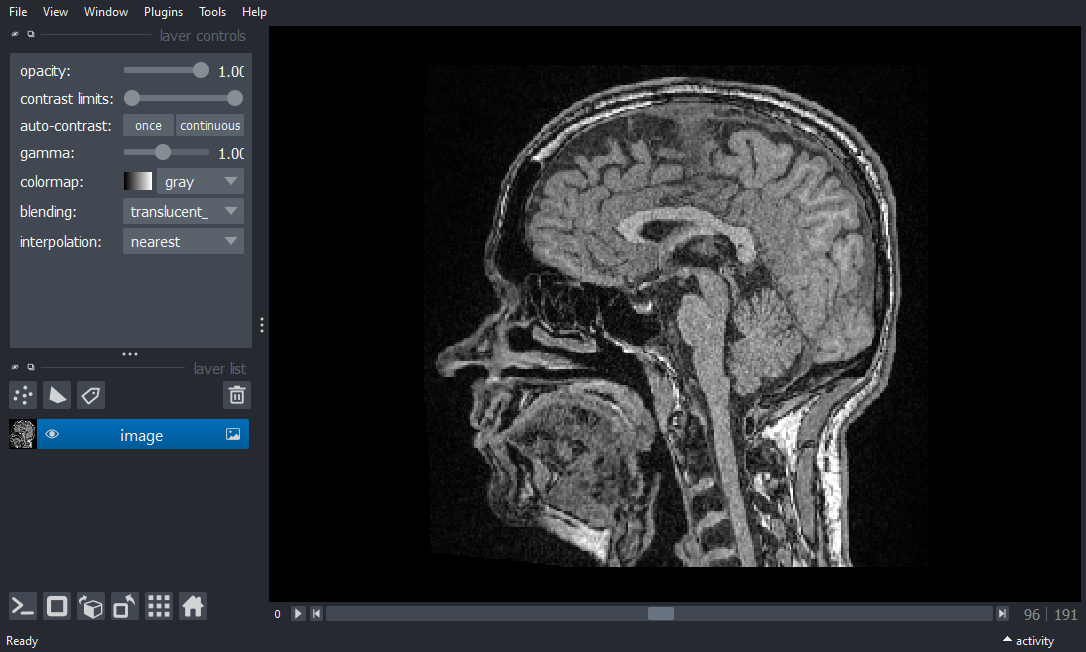

In [4]:
napari.utils.nbscreenshot(viewer)

## Découpage

Nous pouvons déplacer programmatiquement le curseur de la tranche Z comme ceci.

In [5]:
dims = viewer.dims.current_step
dims

(96, 128, 128)

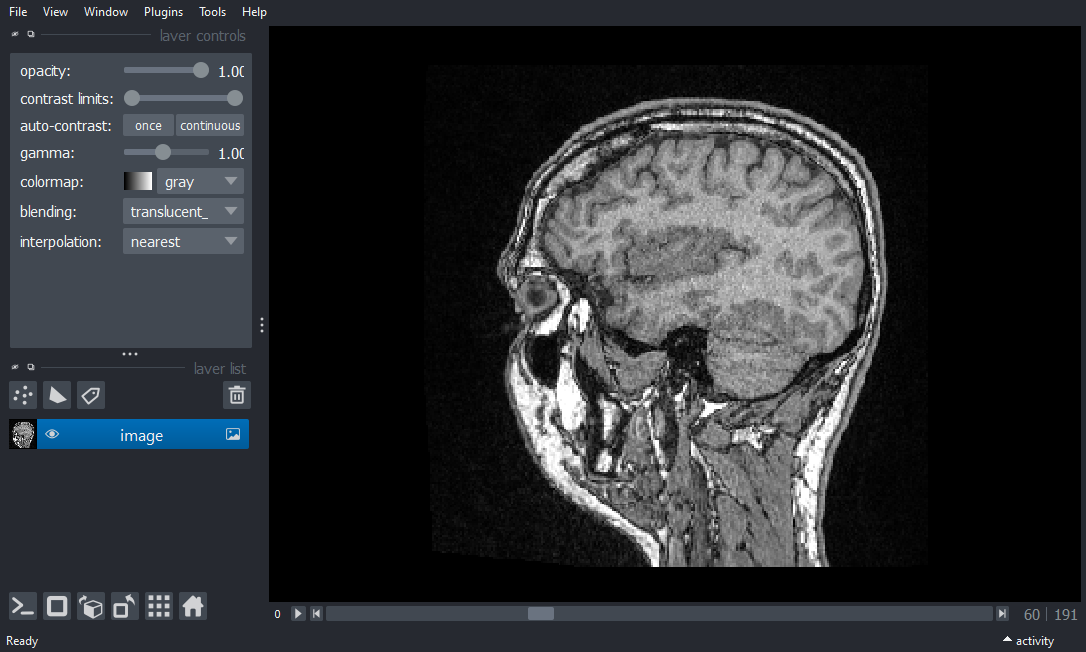

In [6]:
# modify Z-slice position
dims = list(dims)
dims[0] = 60
viewer.dims.current_step = dims

# take another screenshot
napari.utils.nbscreenshot(viewer)

## Rendu 3D

Nous pouvons également activer la vue 3D de manière programmatique.

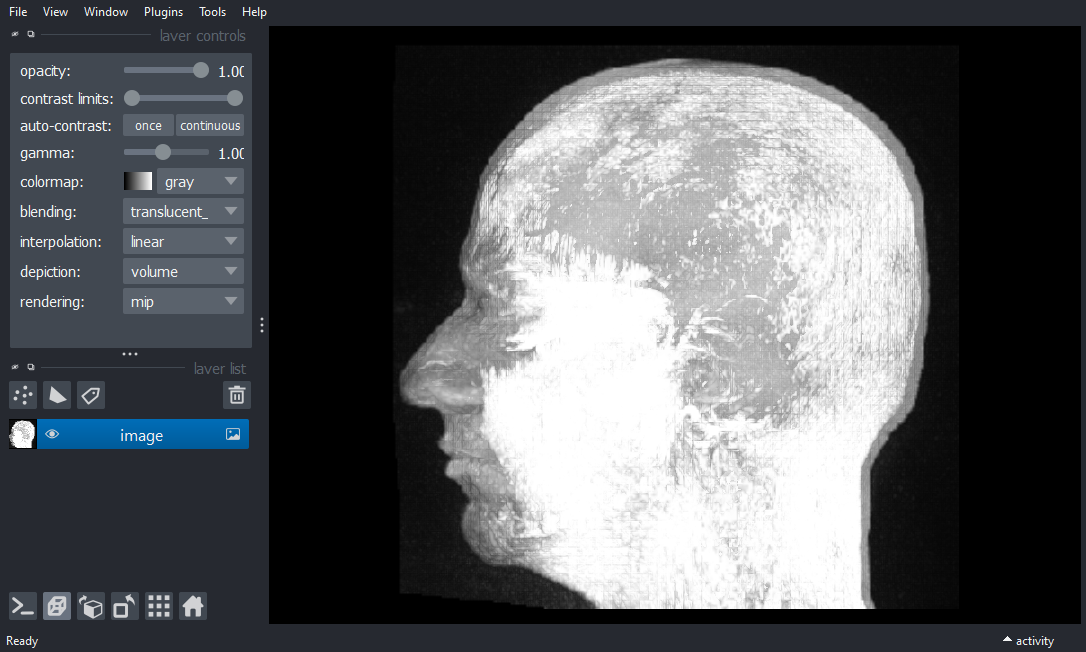

In [7]:
viewer.dims.ndisplay = 3

napari.utils.nbscreenshot(viewer)

## Orientation de la caméra

Pour changer la position de la caméra, il est recommandé d'afficher la caméra, par exemple après une modification manuelle. Cela vous permet de comprendre ce que signifient `center`, `zoom`, `angles`, etc. Vous pouvez ensuite modifier ces paramètres en utilisant Python.

In [8]:
viewer.camera

Camera(center=(95.5, 127.5, 127.5), zoom=2.2191406249999996, angles=(0.0, 0.0, 90.00000000000001), perspective=0.0, interactive=True)

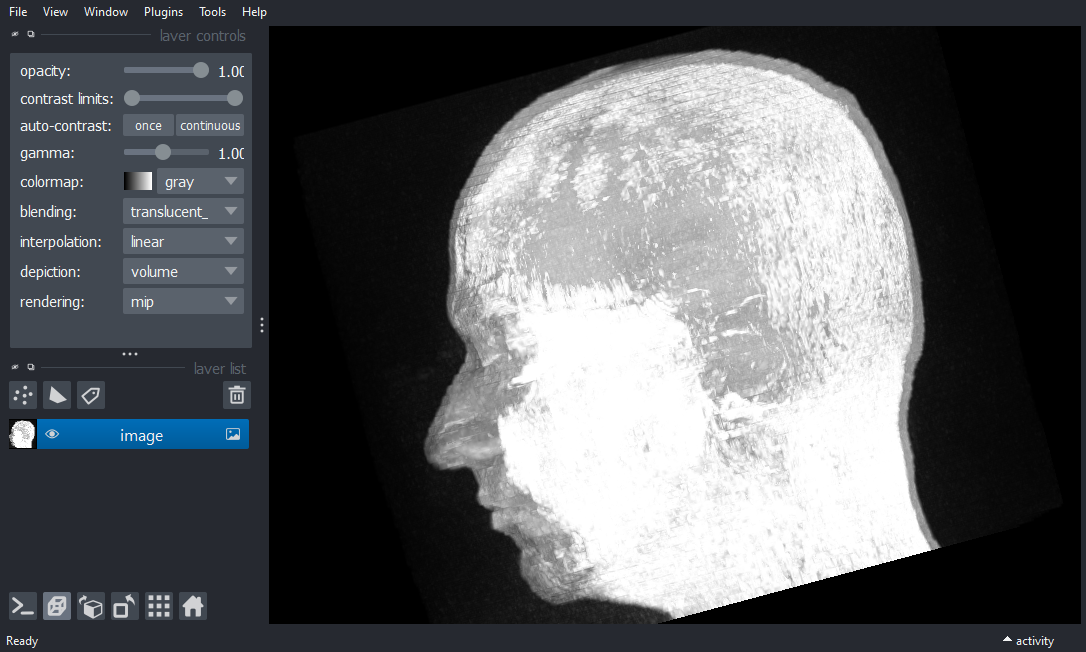

In [9]:
viewer.camera.angles = (15, -15, 90)

napari.utils.nbscreenshot(viewer)

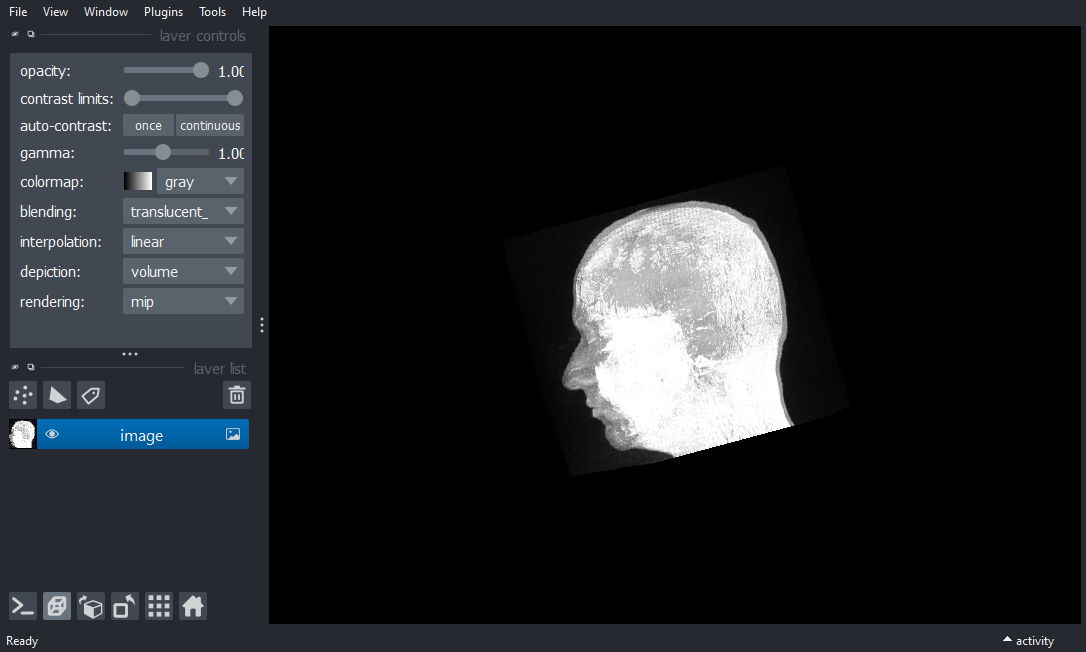

In [10]:
viewer.camera.zoom = 1

napari.utils.nbscreenshot(viewer)

In [11]:
viewer.dims.ndisplay = 2

dims[0] = 96
viewer.dims.current_step = dims

## Propriétés des couches

Pour modifier les cartes de couleurs / tables de correspondance et la plage d'affichage de l'image, vous pouvez utiliser des commandes comme celles-ci.

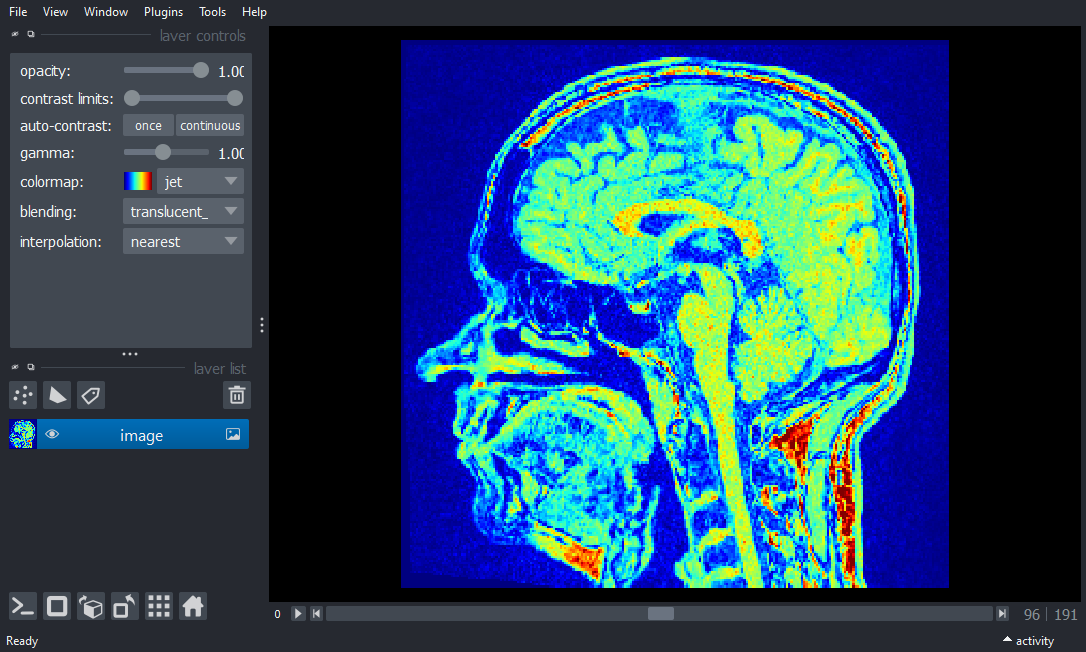

In [12]:
image_layer = viewer.layers[0]

image_layer.colormap = "jet"

napari.utils.nbscreenshot(viewer)

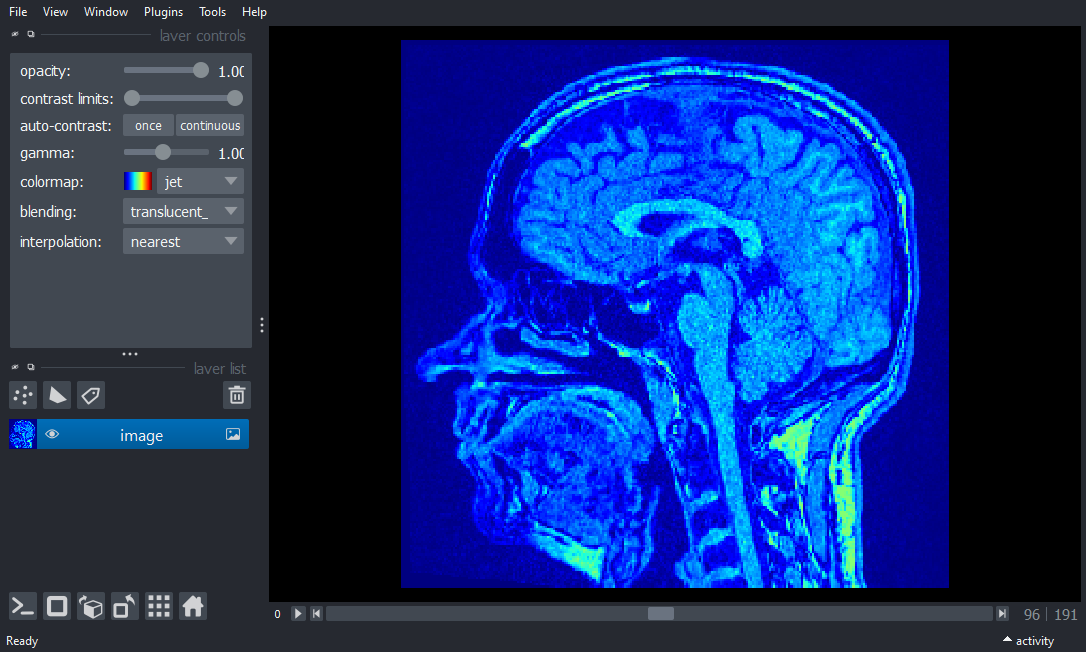

In [13]:
image_layer.contrast_limits = [0, 500]

napari.utils.nbscreenshot(viewer)

In [14]:
image_layer.colormap = 'gray'

## Visualisation des résultats de segmentation

Les résultats de segmentation sont généralement affichés sous forme d'images étiquetées dans Napari. Dans une image étiquetée, les intensités correspondent à l'objet (classe) auquel appartient un pixel. Par exemple, dans une segmentation sémantique, un pixel d'intensité 1 appartient à la catégorie 1 et un pixel d'intensité 2 appartient à la catégorie 2. Lors de la segmentation d'instance, un pixel d'intensité 1 appartient à l'objet 1. Un pixel d'intensité 2 appartient à l'objet 2.

Les images étiquetées peuvent être ajoutées à la liste des couches de Napari en utilisant la commande `viewer.add_labels()`.

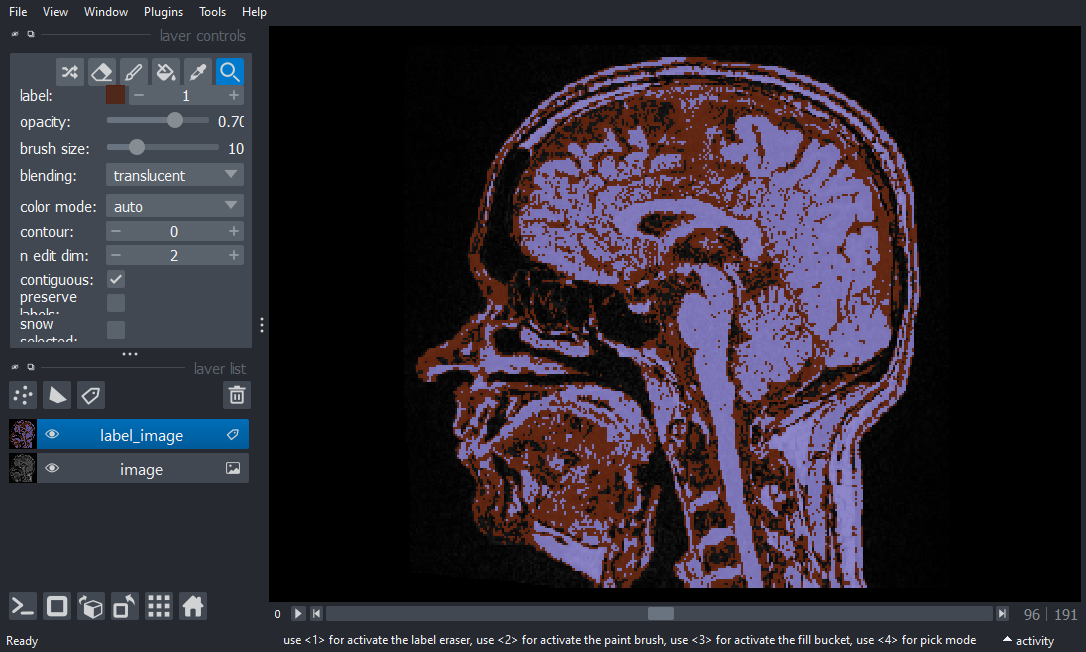

In [15]:
label_image = (image > 50) * 1 + (image > 110) * 2

labels_layer = viewer.add_labels(label_image)

napari.utils.nbscreenshot(viewer)

Les couches d'étiquettes peuvent également être modifiées en conséquence.

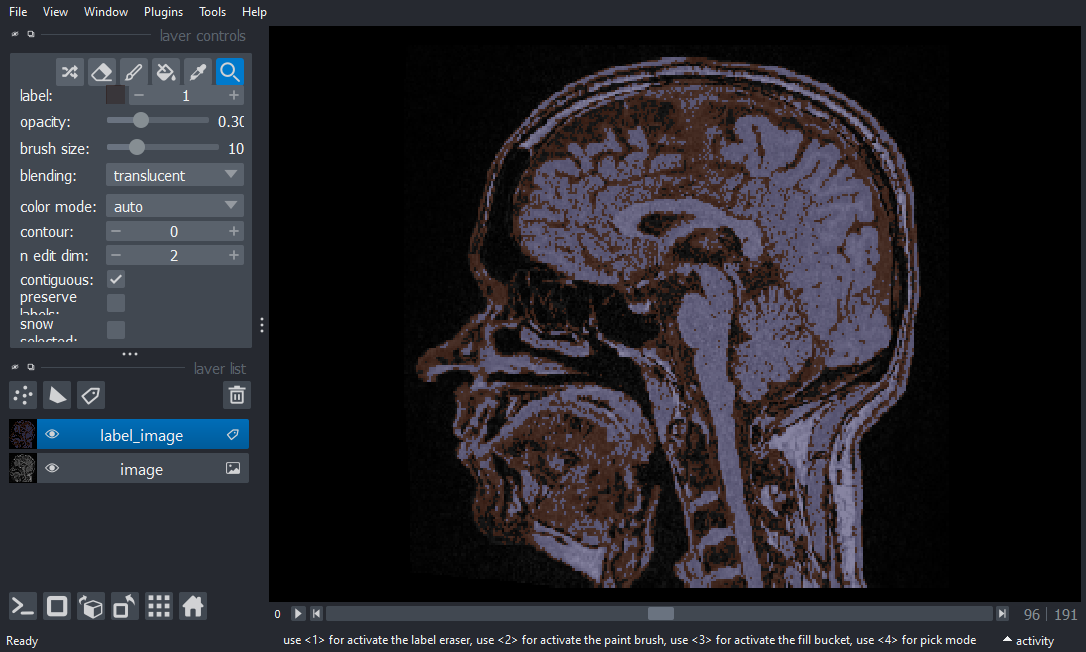

In [16]:
labels_layer.opacity = 0.3

napari.utils.nbscreenshot(viewer)

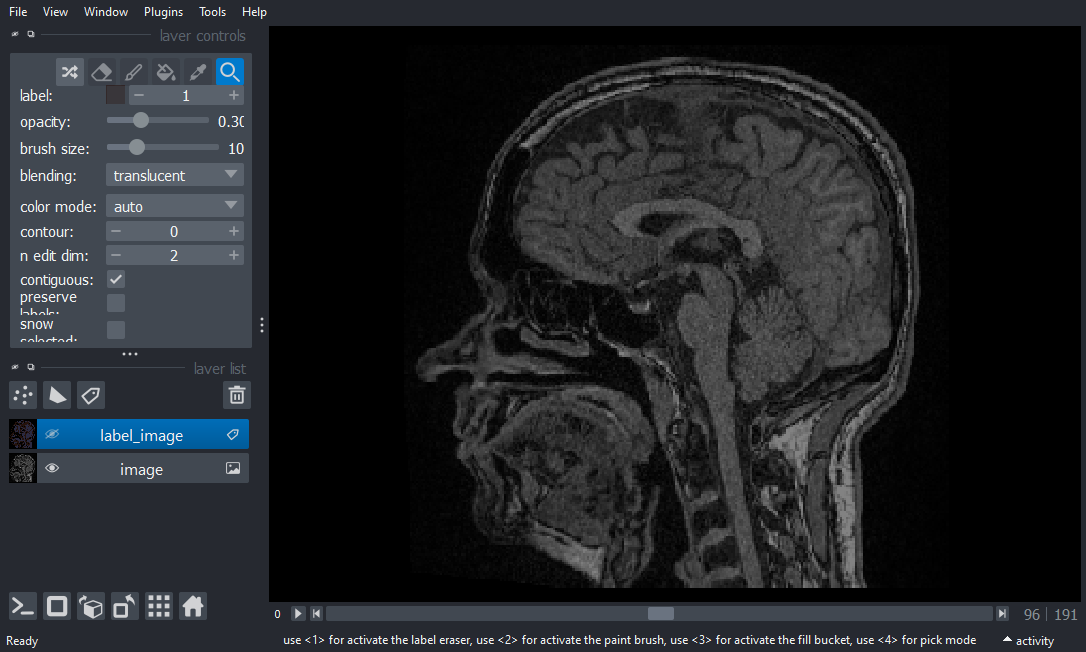

In [17]:
labels_layer.visible = False

napari.utils.nbscreenshot(viewer)

## Suppression des couches
Enfin, nous pouvons également nettoyer et supprimer des couches.

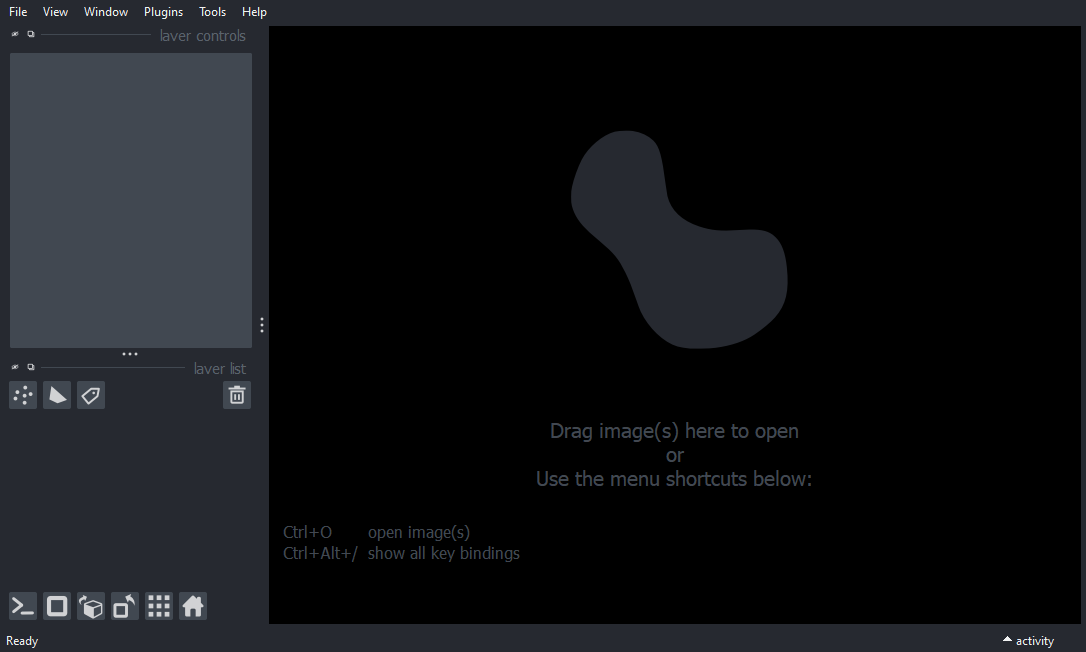

In [18]:
for l in list(viewer.layers):
    viewer.layers.remove(l)
    
napari.utils.nbscreenshot(viewer)

## Exercice
Commencez un nouveau notebook, importez napari, chargez l'image `../data/hela-cells.tif` et ajoutez ses trois canaux indépendamment à napari comme trois couches. Ensuite, jouez avec la carte de couleurs et le mélange dans l'interface utilisateur. Pouvez-vous le faire ressembler à ImageJ ? Consultez également le tutoriel sur les couches d'image de napari [ici](https://napari.org/tutorials/fundamentals/image.html). Pouvez-vous également programmer une telle visualisation ?